<a href="https://colab.research.google.com/github/seungmei/ESAA_24_1/blob/main/OB_3%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OB_3조_프로젝트1_주차수요_예측_AI_경진대회
https://dacon.io/competitions/official/235745/overview/description

## 패키지

In [1]:
import pandas as pd
import numpy as np

## 데이터

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/test.csv')
submission = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/sample_submission.csv')

In [4]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [5]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


## 데이터 시각화

In [7]:
#나눔바른고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [8]:
#모든 그래프에 대해 나눔바른고딕을 사용
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Text(0, 0.5, 'Frequency')

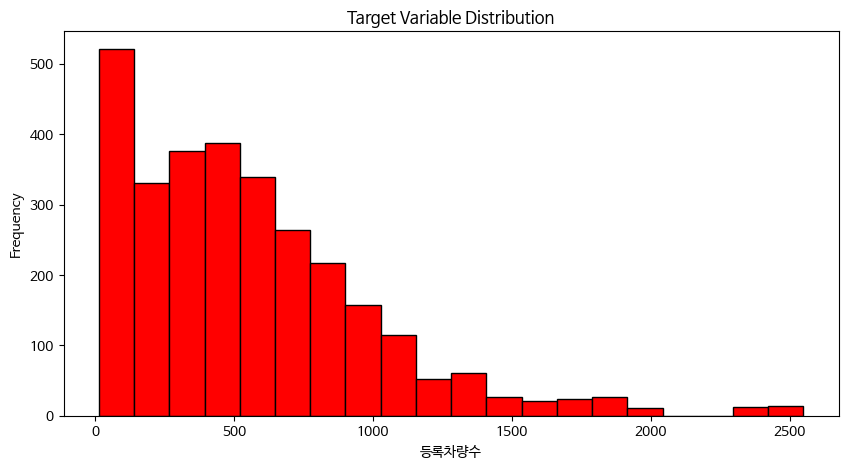

In [9]:
import matplotlib.pyplot as plt

#Target Variable Distribution
plt.figure(figsize=(10, 5))
plt.hist(train['등록차량수'], bins=20, color='red', edgecolor='black')
plt.title('Target Variable Distribution')
plt.xlabel('등록차량수')
plt.ylabel('Frequency')
## need transformation

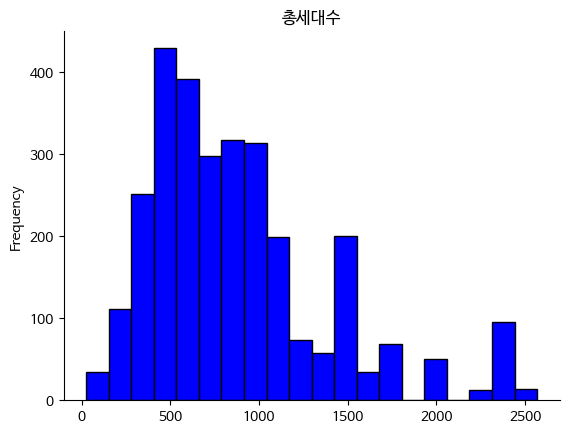

In [10]:
#총세대수
train['총세대수'].plot(kind='hist', bins=20, title='총세대수', color='blue', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

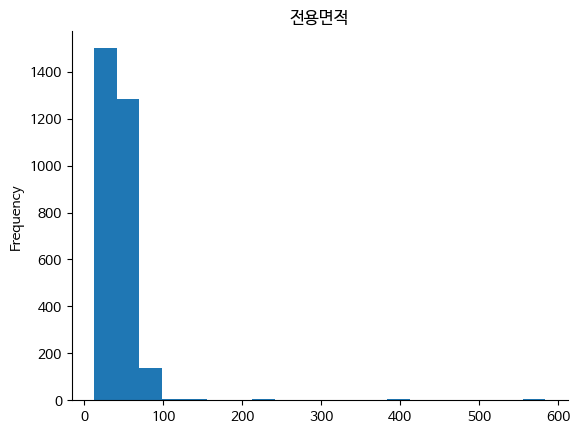

In [11]:
#전용면적
train['전용면적'].plot(kind='hist', bins=20, title='전용면적')
plt.gca().spines[['top', 'right',]].set_visible(False)

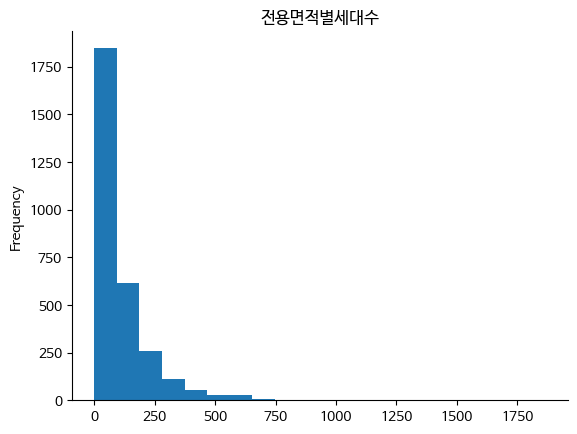

In [12]:
#전용면적별세대수
train['전용면적별세대수'].plot(kind='hist', bins=20, title='전용면적별세대수')
plt.gca().spines[['top', 'right',]].set_visible(False)

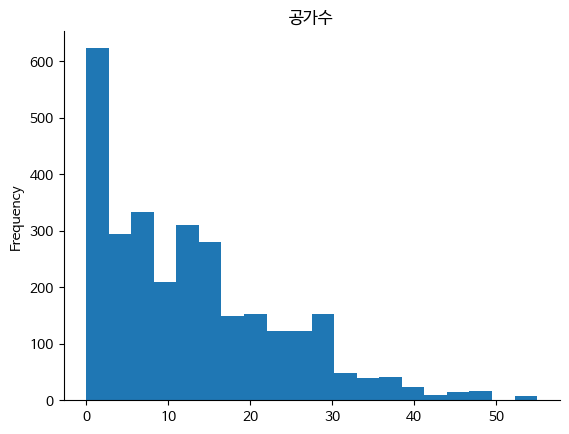

In [13]:
#공가수
train['공가수'].plot(kind='hist', bins=20, title='공가수')
plt.gca().spines[['top', 'right',]].set_visible(False)

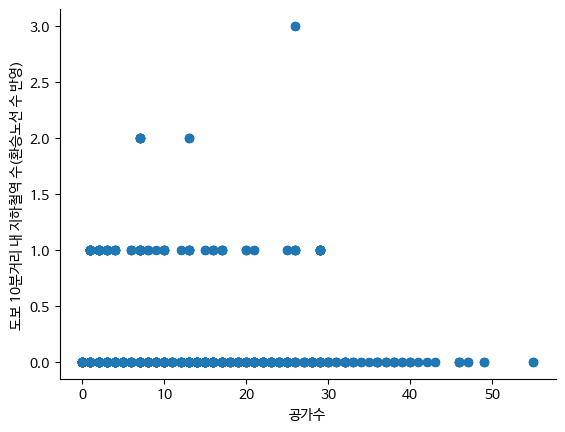

In [14]:
#공가수 vs 도보10분거리 내 지하철 역 수
train.plot(kind='scatter', x='공가수', y='도보 10분거리 내 지하철역 수(환승노선 수 반영)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

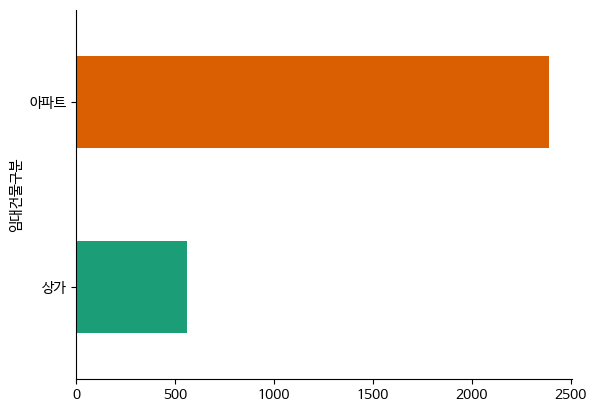

In [15]:
#임대건물구분
import seaborn as sns
train.groupby('임대건물구분').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-16-4ce58f588bfd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train, x='총세대수', y='임대건물구분', inner='box', palette='Dark2')


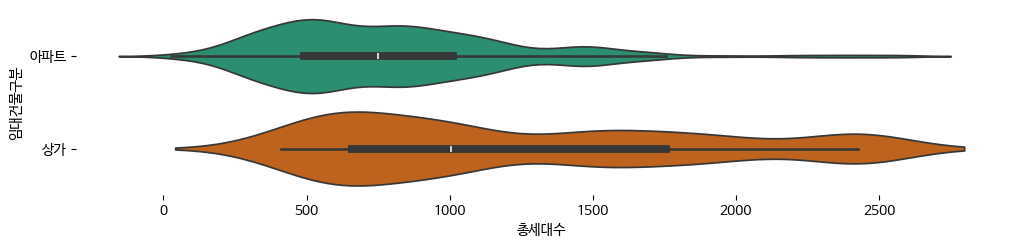

In [16]:
#임대건물구분 vs 총세대수
import seaborn as sns
figsize = (12, 1.2 * len(train['임대건물구분'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train, x='총세대수', y='임대건물구분', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-17-84500243d6ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train, x='전용면적', y='임대건물구분', inner='box', palette='Dark2')


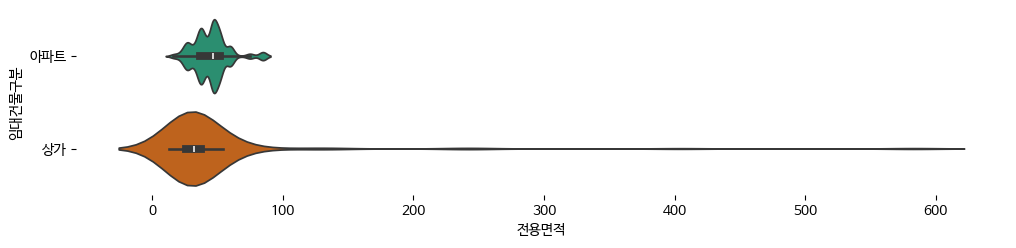

In [17]:
#임대건물구분vs전용면적
figsize = (12, 1.2 * len(train['임대건물구분'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train, x='전용면적', y='임대건물구분', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-18-30f0c8735b7a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train, x='공가수', y='임대건물구분', inner='box', palette='Dark2')


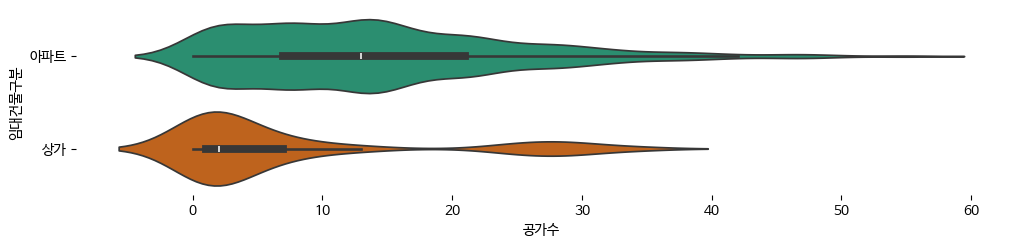

In [18]:
#임대건물구분vs공가수
figsize = (12, 1.2 * len(train['임대건물구분'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train, x='공가수', y='임대건물구분', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-19-b5e2d5b49133>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train, x='전용면적별세대수', y='임대건물구분', inner='box', palette='Dark2')


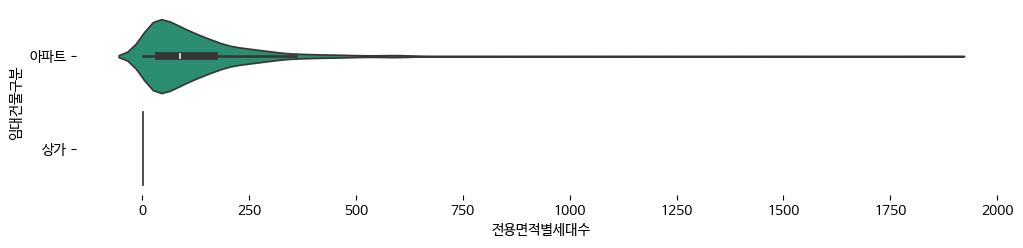

In [19]:
#임대건물구분vs전용면적별세대수

figsize = (12, 1.2 * len(train['임대건물구분'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train, x='전용면적별세대수', y='임대건물구분', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 결측치 확인

In [20]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [21]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

train -> 임대보증금, 임대료, 지하철역 수, 버스정류장 수  
test -> 임대보증금, 임대료, 지하철역 수, 자격유형

In [22]:
# 지하철역 수, 버스정류장 수 NULL -> 0으로 대체
cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

In [23]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [ ]:
# 단지코드 C2411면 자격유형 모두 A -> A로 대체
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'

# 단지코드 C2253면 임대보증금과 임대료가 존재하는 경우 자격유형 C -> C로 대체
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

## 칼럼 확인

In [25]:
train.groupby(['단지코드']).nunique(dropna=False).sum(axis=0)

총세대수                             423
임대건물구분                           456
지역                               423
공급유형                             488
전용면적                            1898
전용면적별세대수                        2230
공가수                              423
자격유형                             510
임대보증금                           1277
임대료                             1289
도보 10분거리 내 지하철역 수(환승노선 수 반영)     423
도보 10분거리 내 버스정류장 수               423
단지내주차면수                          423
등록차량수                            423
dtype: int64

**하나의 단지코드에 하나의 값만 존재** : 총세대수, 지역, 공가수, 지하철역 수, 버스정류장 수, 단지내주차면수, 등록차량수

**두 개 이상의 값 존재** : 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료

> 단지 코드별 데이터로 만들어야 하기 때문에 하나의 값만 존재하는 값은 그대로 사용하고, 두 개 이상의 값이 존재하는 피처는 가공해야 함

## 지역명 숫자로 매핑

In [26]:
local_map = {}
for i, loc in enumerate(train['지역'].unique()):
    local_map[loc] = i

train['지역'] = train['지역'].map(local_map)
test['지역'] = test['지역'].map(local_map)

In [27]:
# 우선 하나의 값만 존재하는 칼럼만 사용하여 데이터셋 만들기

unique_cols = ['총세대수', '지역', '공가수',
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

## 1) 임대건물구분
아파트 or 상가 - OneHot인코딩

In [28]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [29]:
reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')
reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1003,0.0,1.0
C1006,1.0,1.0
C1016,0.0,1.0
C1019,0.0,1.0
C1030,0.0,1.0
...,...,...
C2653,0.0,1.0
C2675,0.0,1.0
C2676,1.0,1.0



## 2) 공급유형과 자격유형

공급유형이 대부분의 자격유형 데이터 설명 가능  
-> 자격유형 변수는 사용하지 않음, 공급유형은 OneHot인코딩

In [30]:
pd.crosstab(train['공급유형'], train['자격유형'])

자격유형,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
공급유형,,,,,,,,,,,,,,,
공공분양,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
공공임대(10년),205,0,0,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(50년),31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(5년),3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
공공임대(분납),12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
국민임대,1539,21,0,0,34,0,9,155,0,0,0,0,0,0,0
영구임대,2,0,95,0,3,3,0,0,49,0,0,0,0,0,0
임대상가,0,0,0,562,0,0,0,0,0,0,0,0,0,0,0
장기전세,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')

,공급유형_공공분양,공급유형_공공임대(10년),공급유형_공공임대(50년),공급유형_공공임대(5년),공급유형_공공임대(분납),공급유형_국민임대,공급유형_영구임대,공급유형_임대상가,공급유형_장기전세,공급유형_행복주택
단지코드,,,,,,,,,,
C1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1004,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
C1005,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1014,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
C2663,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2666,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2670,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 3) 전용면적
단지코드별 mean, 전체 sum 변수로 사용

In [32]:
train.groupby(['단지코드'])['전용면적'].mean()

단지코드
C1000    45.218571
C1004    39.136842
C1005    54.360000
C1013    46.142000
C1014    49.232857
           ...    
C2663    41.005000
C2666    43.258333
C2670    40.918000
C2680    43.350000
C2692    43.570000
Name: 전용면적, Length: 423, dtype: float64

In [33]:
면적_mean = train.groupby(['단지코드'])['전용면적'].mean()
면적_sum = train.groupby(['단지코드'])['전용면적'].sum()
train_agg['전용면적 평균'] = 면적_mean
train_agg['전용면적 총합'] = 면적_sum

면적_mean = test.groupby(['단지코드'])['전용면적'].mean()
면적_sum = test.groupby(['단지코드'])['전용면적'].sum()
test_agg['전용면적 평균'] = 면적_mean
test_agg['전용면적 총합'] = 면적_sum

## 4) 전용면적 별 세대수, 임대보증금, 임대료
사용하지 않음



---



## 범주형 인코딩

In [34]:
# 아까 만들어둔 train_agg에 병합
train_agg = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')
                       ], axis=1)

test_agg = pd.concat([test_agg,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='공급유형', value_col='counter')
                       ], axis=1)



---



# test 세트 가공

In [35]:
# test에 없는 칼럼 채우기
test_agg['공급유형_공공임대(5년)']=0
test_agg['공급유형_장기전세']=0
test_agg['공급유형_공공분양']=0

In [36]:
X_train = train_agg.drop(['등록차량수'], axis = 1)
y_train = train_agg['등록차량수']
X_test = test_agg

In [37]:
# 칼럼 순서 맞춰주기
feature_order = ['총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '전용면적 평균', '전용면적 총합', '임대건물구분_상가', '임대건물구분_아파트', '공급유형_공공분양', '공급유형_공공임대(10년)', '공급유형_공공임대(50년)', '공급유형_공공임대(5년)', '공급유형_공공임대(분납)', '공급유형_국민임대', '공급유형_영구임대', '공급유형_임대상가', '공급유형_장기전세', '공급유형_행복주택']
X_test = X_test[feature_order]



---



# Modeling
Catboost, Lasso, Xgboost

In [40]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.6 MB/s eta 0:00:00


In [38]:
from sklearn.model_selection import GridSearchCV

### 1) CatBoost

In [41]:
# 하이퍼 파라미터 튜닝
from catboost import CatBoostRegressor

cat = CatBoostRegressor()

params = {'n_estimators': [100, 300, 500] , 'depth': [5, 10, None]}

gridcv = GridSearchCV(cat, param_grid = params, cv=5, verbose = 1000)
gridcv.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
45:	learn: 99.8273101	total: 318ms	remaining: 374ms
46:	learn: 97.8494700	total: 327ms	remaining: 368ms
47:	learn: 95.5303762	total: 335ms	remaining: 363ms
48:	learn: 93.9611732	total: 340ms	remaining: 354ms
49:	learn: 92.3072747	total: 353ms	remaining: 353ms
50:	learn: 91.9000435	total: 360ms	remaining: 346ms
51:	learn: 89.8994755	total: 367ms	remaining: 339ms
52:	learn: 88.4173869	total: 372ms	remaining: 330ms
53:	learn: 87.6876440	total: 384ms	remaining: 327ms
54:	learn: 85.4418675	total: 388ms	remaining: 317ms
55:	learn: 84.4433679	total: 400ms	remaining: 314ms
56:	learn: 83.3491586	total: 404ms	remaining: 305ms
57:	learn: 82.0390205	total: 415ms	remaining: 300ms
58:	learn: 81.1739155	total: 418ms	remaining: 290ms
59:	learn: 79.9890732	total: 422ms	remaining: 281ms
60:	learn: 79.2575200	total: 436ms	remaining: 279ms
61:	learn: 77.8994774	total: 441ms	remaining: 270ms
62:	learn: 76.7113359	total: 464ms	remaining: 273ms
63:	learn: 75.7159118	total:

In [42]:
# 최적 파라미터로 훈련

cat = CatBoostRegressor(**gridcv.best_params_)
cat.fit(X_train, y_train)

Learning rate set to 0.062788
0:	learn: 377.7221208	total: 1.58ms	remaining: 791ms
1:	learn: 364.1570393	total: 4.43ms	remaining: 1.1s
2:	learn: 353.8033196	total: 6.24ms	remaining: 1.03s
3:	learn: 343.1610494	total: 8.37ms	remaining: 1.04s
4:	learn: 332.0938946	total: 11.1ms	remaining: 1.1s
5:	learn: 321.6326555	total: 14.2ms	remaining: 1.17s
6:	learn: 311.4912117	total: 15.7ms	remaining: 1.1s
7:	learn: 303.1015323	total: 17.6ms	remaining: 1.08s
8:	learn: 295.0482852	total: 19.3ms	remaining: 1.05s
9:	learn: 286.6400590	total: 21.2ms	remaining: 1.04s
10:	learn: 278.8711823	total: 22.7ms	remaining: 1.01s
11:	learn: 272.2431789	total: 24.2ms	remaining: 984ms
12:	learn: 265.5329304	total: 26.3ms	remaining: 984ms
13:	learn: 258.8251906	total: 28.2ms	remaining: 979ms
14:	learn: 253.0418641	total: 29.1ms	remaining: 941ms
15:	learn: 247.9159563	total: 30ms	remaining: 907ms
16:	learn: 242.5697754	total: 31.7ms	remaining: 899ms
17:	learn: 237.7029015	total: 32.8ms	remaining: 879ms
18:	learn: 23

In [43]:
pred_cat = cat.predict(X_test)
submission['num'] = pred_cat
submission.to_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/submission_cat.csv', index=False)

리더보드 점수 : 96.9261665811 / 105.7249073475  
(로그변환 O : 105.969747828 / 107.3728771102)

### 2) Lasso

In [44]:
# 하이퍼 파라미터 튜닝
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)

params = {'alpha': [0.4, 0.5, 0.9, 1, 1.2] , 'max_iter': [100, 300, 500]}

gridcv = GridSearchCV(lasso, param_grid=params, cv=5)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'alpha': 1, 'max_iter': 100}


In [46]:
# 최적 파라미터로 훈련
lasso = Lasso(**gridcv.best_params_)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

submission['num'] = pred_lasso
submission.to_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/submission_lasso.csv', index=False)

리더보드 점수 : 115.6796286274 / 113.9736553813

### 3) XGBoost

In [47]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(random_state=42)

params = {
        'min_child_weight':[0.1, 0.3, 0.5],
        'max_depth':[1, 3, 5, None],
        'subsample':[0.1, 0.3, 0.5],
        'n_estimators': [100, 300, 500]
}

gridcv = GridSearchCV(xgb_reg, param_grid = params, cv = 5)
gridcv.fit(X_train, y_train)


print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 1, 'min_child_weight': 0.1, 'n_estimators': 500, 'subsample': 0.3}


In [48]:
xgb_reg = XGBRegressor(**gridcv.best_params_)
xgb_reg.fit(X_train, y_train)

pred_xgb = xgb_reg.predict(X_test)
submission['num'] = pred_xgb
submission.to_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/submission_xgb.csv', index=False)

리더보드 점수 : 105.6472499633 / 114.1366248878

#### 혼합 모델

In [49]:
# 최적 파라미터로 훈련 - catboost

cat = CatBoostRegressor(n_estimators=100, depth=3, random_state=42)
cat.fit(X_train, y_train)

Learning rate set to 0.232349
0:	learn: 343.5071663	total: 606us	remaining: 60ms
1:	learn: 305.7600889	total: 1.25ms	remaining: 61.1ms
2:	learn: 277.0022501	total: 1.89ms	remaining: 61.3ms
3:	learn: 254.1397124	total: 2.39ms	remaining: 57.4ms
4:	learn: 241.6706165	total: 3.79ms	remaining: 72ms
5:	learn: 226.9081633	total: 4.59ms	remaining: 71.9ms
6:	learn: 217.0706442	total: 5.35ms	remaining: 71.1ms
7:	learn: 208.2202648	total: 6.05ms	remaining: 69.6ms
8:	learn: 200.6845598	total: 6.73ms	remaining: 68.1ms
9:	learn: 193.4786104	total: 7.43ms	remaining: 66.9ms
10:	learn: 189.1317596	total: 8.1ms	remaining: 65.5ms
11:	learn: 184.2085046	total: 8.81ms	remaining: 64.6ms
12:	learn: 181.1292198	total: 9.41ms	remaining: 63ms
13:	learn: 177.4194355	total: 10.4ms	remaining: 63.8ms
14:	learn: 173.5598128	total: 12ms	remaining: 68ms
15:	learn: 171.6261680	total: 13ms	remaining: 68.2ms
16:	learn: 169.5459490	total: 14ms	remaining: 68.4ms
17:	learn: 169.2214276	total: 14.9ms	remaining: 67.8ms
18:	le

In [50]:
# 최적 파라미터로 훈련 - xgboost
xgb_reg = XGBRegressor(max_depth=1, min_child_weight=0.1, n_estimators=100, subsample=0.5)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=0.1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred_mix = 0.4*pred_xgb + 0.6*pred_cat

submission['num'] = pred_mix
submission.to_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/parking/submission_mixed.csv', index=False)

### 전처리 ver 2. 이상치 처리, 등록차량수와 상관관계 낮은 임대건물구분 drop, 스케일링

In [52]:
'''
1. 이상치 처리
train_agg['주차면수/총세대수'] = train_agg['단지내주차면수'] / train_agg['총세대수']

Q1 = train_agg['주차면수/총세대수'].quantile(0.25)
Q3 = train_agg['주차면수/총세대수'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train_agg[(train_agg['주차면수/총세대수'] < lower_bound) | (train_agg['주차면수/총세대수'] > upper_bound)].index
train_agg = train_agg.drop(outliers, axis=0)

train_agg = train_agg.drop('주차면수/총세대수', axis=1)

2. 등록차량수와 상관관계 낮은 임대건물구분 drop
train_agg.corr()['등록차량수'].drop('등록차량수').sort_values(ascending=False)

X_train = train_agg.drop(['등록차량수', '임대건물구분_상가', '임대건물구분_아파트'], axis = 1)
y_train = train_agg['등록차량수']
X_test = test_agg.drop(['임대건물구분_상가', '임대건물구분_아파트'], axis=1)

3. 스케일링
from sklearn.preprocessing import RobustScaler, StandardScaler

scailing_features = ['총세대수', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '전용면적 평균', '전용면적 총합']

scaler = StandardScaler()
X_train.loc[:, scailing_features] = scaler.fit_transform(X_train[scailing_features])
X_test.loc[:, scailing_features] = scaler.transform(X_test[scailing_features])
'''

"\n1. 이상치 처리\ntrain_agg['주차면수/총세대수'] = train_agg['단지내주차면수'] / train_agg['총세대수']\n\nQ1 = train_agg['주차면수/총세대수'].quantile(0.25)\nQ3 = train_agg['주차면수/총세대수'].quantile(0.75)\nIQR = Q3 - Q1\n\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\noutliers = train_agg[(train_agg['주차면수/총세대수'] < lower_bound) | (train_agg['주차면수/총세대수'] > upper_bound)].index\ntrain_agg = train_agg.drop(outliers, axis=0)\n\ntrain_agg = train_agg.drop('주차면수/총세대수', axis=1)\n\n2. 등록차량수와 상관관계 낮은 임대건물구분 drop\ntrain_agg.corr()['등록차량수'].drop('등록차량수').sort_values(ascending=False)\n\nX_train = train_agg.drop(['등록차량수', '임대건물구분_상가', '임대건물구분_아파트'], axis = 1)\ny_train = train_agg['등록차량수']\nX_test = test_agg.drop(['임대건물구분_상가', '임대건물구분_아파트'], axis=1)\n\n3. 스케일링\nfrom sklearn.preprocessing import RobustScaler, StandardScaler\n\nscailing_features = ['총세대수', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '전용면적 평균', '전용면적 총합']\n\nscaler = StandardScaler()\nX_train.loc[:, scailing_features] = scaler.f

### 전처리 ver 3. 단지코드 2개로 부여된 경우 통일

In [53]:
'''
위의 전처리에 에러 수정 코드를 추가해보았다.

# 동일한 단지에 단지코드가 2개로 부여된 경우를 확인해서 하나로 통일
동일한 단지에 단지코드가 2개로 부여된 경우 :['C2085', 'C1397'], ['C2431', 'C1649'], ['C1036', 'C2675']

train.loc[train['단지코드'] == 'C1397', '단지코드'] = 'C2085'
train.loc[train['단지코드'] == 'C2085', '총세대수'] = 1339

train.loc[train['단지코드'] == 'C2431', '단지코드'] = 'C1649'
train.loc[train['단지코드'] == 'C1649', '총세대수'] = 1047
train.loc[train['단지코드'] == 'C1649', '등록차량수'] = 1214

test.loc[test['단지코드'] == 'C2675', '단지코드'] = 'C1036'


# 코드 수정된 부분
unique_cols = ['총세대수', '지역',
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()

# 나머지 전처리 코드는 동일하다.

# 하이퍼 파라미터 튜닝
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

cat = CatBoostRegressor(random_state=3)
params = {'n_estimators': [100,200,300,500,1000] , 'depth': [2,4,6,8]}

gridcv = GridSearchCV(cat, param_grid=params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
# GridSearchCV 최적 파라미터: {'depth': 2, 'n_estimators': 100}

# 최적 파라미터로 훈련
cat = CatBoostRegressor(n_estimators=100, depth=2, random_state=3)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
submission['num'] = y_pred
submission.to_csv('cat2.csv', index=False)
'''

"\n위의 전처리에 에러 수정 코드를 추가해보았다.\n\n# 동일한 단지에 단지코드가 2개로 부여된 경우를 확인해서 하나로 통일\n동일한 단지에 단지코드가 2개로 부여된 경우 :['C2085', 'C1397'], ['C2431', 'C1649'], ['C1036', 'C2675']\n\ntrain.loc[train['단지코드'] == 'C1397', '단지코드'] = 'C2085'\ntrain.loc[train['단지코드'] == 'C2085', '총세대수'] = 1339\n\ntrain.loc[train['단지코드'] == 'C2431', '단지코드'] = 'C1649'\ntrain.loc[train['단지코드'] == 'C1649', '총세대수'] = 1047\ntrain.loc[train['단지코드'] == 'C1649', '등록차량수'] = 1214\n\ntest.loc[test['단지코드'] == 'C2675', '단지코드'] = 'C1036'\n\n\n# 코드 수정된 부분\nunique_cols = ['총세대수', '지역',\n               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',\n               '단지내주차면수', '등록차량수']\ntrain_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()\n\n# 나머지 전처리 코드는 동일하다.\n\n# 하이퍼 파라미터 튜닝\nfrom catboost import CatBoostRegressor\nfrom sklearn.model_selection import GridSearchCV\n\ncat = CatBoostRegressor(random_state=3)\nparams = {'n_estimators': [100,200,300,500,1000] , 'depth': [2,4,6,8]}\n\ngridcv = GridSearchCV(cat, param_grid=params, scoring='accuracy', cv=

리더보드 점수 : 105.9477925104 , 119.3433972947

### 전처리 ver 4. 타겟 변수 변환

In [55]:
'''
#Log Transformation
transformed_log = np.log1p(train_agg['등록차량수'])

plt.figure(figsize=(10, 5))
plt.hist(transformed_log, bins=20, edgecolor='black', color='m')
plt.title('After Log Transformation')
plt.xlabel('등록차량수')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
'''

"\n#Log Transformation\ntransformed_log = np.log1p(train_agg['등록차량수'])\n\nplt.figure(figsize=(10, 5))\nplt.hist(transformed_log, bins=20, edgecolor='black', color='m')\nplt.title('After Log Transformation')\nplt.xlabel('등록차량수')\nplt.ylabel('Frequency')\n\nplt.tight_layout()\nplt.show()\n"

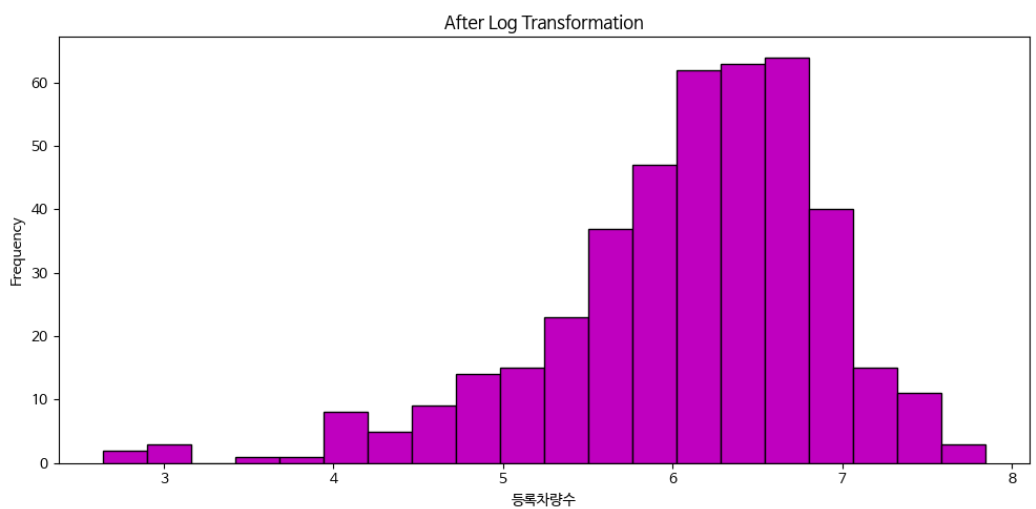

In [56]:
'''
# Box-Cox Transformation
from scipy.stats import boxcox

transformed_boxcox, lambda_val = boxcox(train_agg['등록차량수'])

plt.figure(figsize=(10, 5))
plt.hist((transformed_boxcox), bins=20, color='c', edgecolor='black')
plt.title('After Box-Cox Transformation')
plt.xlabel('Box-Cox(등록차량수)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
'''

"\n# Box-Cox Transformation\nfrom scipy.stats import boxcox\n\ntransformed_boxcox, lambda_val = boxcox(train_agg['등록차량수'])\n\nplt.figure(figsize=(10, 5))\nplt.hist((transformed_boxcox), bins=20, color='c', edgecolor='black')\nplt.title('After Box-Cox Transformation')\nplt.xlabel('Box-Cox(등록차량수)')\nplt.ylabel('Frequency')\n\nplt.tight_layout()\nplt.show()\n"

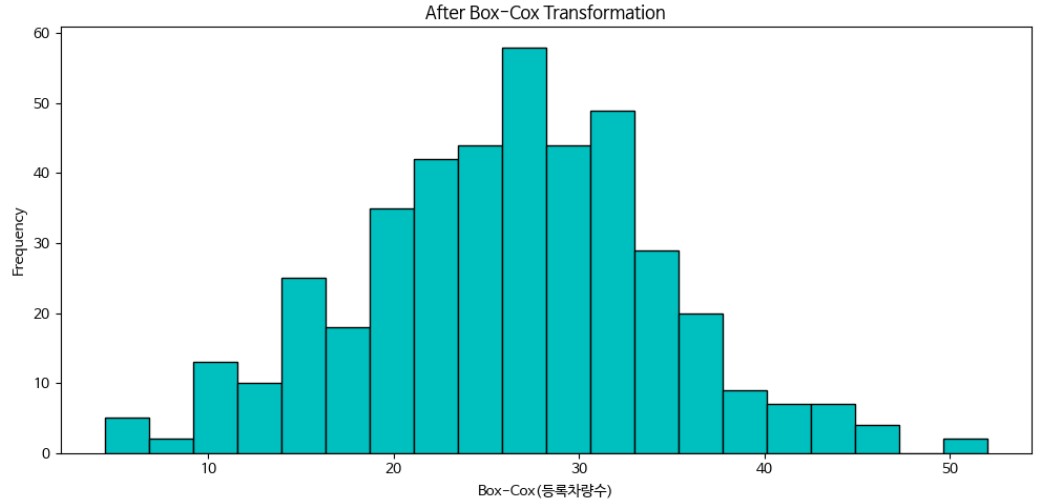

In [57]:
'''
# Target Variable은 box-cox 변환하기로 결정
train_agg['등록차량수'] = transformed_boxcox
'''

"\n# Target Variable은 box-cox 변환하기로 결정\ntrain_agg['등록차량수'] = transformed_boxcox\n"

In [58]:
'''
#Modeling - Catboost
X_train = train_agg.drop(['등록차량수'], axis = 1)
y_train = train_agg['등록차량수']
X_test = test_agg

# 하이퍼 파라미터 튜닝
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

cat = CatBoostRegressor(random_state=3)

params = {'n_estimators': [100,300,500,1000] , 'depth': [2,4,6,8], 'learning_rate': [0.01, 0.05, 0.1]}

gridcv = GridSearchCV(cat, param_grid=params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

# 최적 파라미터로 훈련

cat = CatBoostRegressor(n_estimators=100, depth=2, learning_rate=0.01, random_state=3, verbose=100)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

# Target Variable 역변환
from scipy.special import inv_boxcox
y_pred = inv_boxcox(y_pred, lambda_val)

submission['num'] = y_pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/parking/submission_cat.csv', index=False)
'''

"\n#Modeling - Catboost\nX_train = train_agg.drop(['등록차량수'], axis = 1)\ny_train = train_agg['등록차량수']\nX_test = test_agg\n\n# 하이퍼 파라미터 튜닝\nfrom catboost import CatBoostRegressor\nfrom sklearn.model_selection import GridSearchCV\n\ncat = CatBoostRegressor(random_state=3)\n\nparams = {'n_estimators': [100,300,500,1000] , 'depth': [2,4,6,8], 'learning_rate': [0.01, 0.05, 0.1]}\n\ngridcv = GridSearchCV(cat, param_grid=params, scoring='accuracy', cv=5)\ngridcv.fit(X_train, y_train)\n\nprint('GridSearchCV 최적 파라미터:', gridcv.best_params_)\n\n# 최적 파라미터로 훈련\n\ncat = CatBoostRegressor(n_estimators=100, depth=2, learning_rate=0.01, random_state=3, verbose=100)\ncat.fit(X_train, y_train)\n\ny_pred = cat.predict(X_test)\n\n# Target Variable 역변환\nfrom scipy.special import inv_boxcox\ny_pred = inv_boxcox(y_pred, lambda_val)\n\nsubmission['num'] = y_pred\nsubmission.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/parking/submission_cat.csv', index=False)\n"

리더보드 : 194.799(box-cox 변환 시)

In [59]:
'''
#Modeling - Lasso
# 하이퍼 파라미터 튜닝
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=3)

params = {'alpha': [0,0.1,0.2,0.3,0.4] , 'max_iter': [300,500,1000]}

gridcv = GridSearchCV(lasso, param_grid=params, cv=5)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

# 최적 파라미터로 훈련

lasso = Lasso(alpha=0.1, max_iter=300)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

# Target Variable 역변환

from scipy.special import inv_boxcox
y_pred = inv_boxcox(y_pred, lambda_val)

submission['num'] = y_pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/parking/submission_lasso.csv', index=False)
'''

"\n#Modeling - Lasso\n# 하이퍼 파라미터 튜닝\nfrom sklearn.linear_model import Lasso\nfrom sklearn.model_selection import GridSearchCV\n\nlasso = Lasso(random_state=3)\n\nparams = {'alpha': [0,0.1,0.2,0.3,0.4] , 'max_iter': [300,500,1000]}\n\ngridcv = GridSearchCV(lasso, param_grid=params, cv=5)\ngridcv.fit(X_train, y_train)\n\nprint('GridSearchCV 최적 파라미터:', gridcv.best_params_)\n\n# 최적 파라미터로 훈련\n\nlasso = Lasso(alpha=0.1, max_iter=300)\nlasso.fit(X_train, y_train)\n\ny_pred = lasso.predict(X_test)\n\n# Target Variable 역변환\n\nfrom scipy.special import inv_boxcox\ny_pred = inv_boxcox(y_pred, lambda_val)\n\nsubmission['num'] = y_pred\nsubmission.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/parking/submission_lasso.csv', index=False)\n"

리더보드 : 109.087 (Lasso의 경우, 타겟 변수 변환하지 않았을 때보다 리더보드 점수가 좋아짐.)